### Mini Project 3

# **Predict Customer Personality to Boost Marketing Campaign by Using Machine Learning**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Load Data

In [99]:
df = pd.read_csv('marketing_campaign_data.csv')
df.head()

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,...,7,0,0,0,0,0,0,3,11,1
1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,...,5,0,0,0,0,0,0,3,11,0
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,...,4,0,0,0,0,0,0,3,11,0
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,...,6,0,0,0,0,0,0,3,11,0
4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,...,5,0,0,0,0,0,0,3,11,0


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2240 non-null   int64  
 1   ID                   2240 non-null   int64  
 2   Year_Birth           2240 non-null   int64  
 3   Education            2240 non-null   object 
 4   Marital_Status       2240 non-null   object 
 5   Income               2216 non-null   float64
 6   Kidhome              2240 non-null   int64  
 7   Teenhome             2240 non-null   int64  
 8   Dt_Customer          2240 non-null   object 
 9   Recency              2240 non-null   int64  
 10  MntCoke              2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-null   int64  
 15  MntGoldProds         2240 non-null   i

---

## **Conversion Rate Analysis Based On Income, Spending And Age**

### Feature Engineering
---

In [101]:
df1 = df.copy()

In [102]:
# Membuat kolom baru untuk umur
df1['age'] = 2024 - df1['Year_Birth']

# Membuat tabel kelompok umur
df1['age_group'] = np.where(df1['age'] <= 40, '<40',
                   np.where(df1['age'] <= 60, '41-60',
                  '>60'))

# Membuat kolom untuk jumlah anak
df1['total_children'] = df1['Kidhome'] + df1['Teenhome']

# Membuat tabel total pengeluaran
df1['total_spending'] = df1['MntCoke'] + df1['MntFruits'] + df1['MntMeatProducts'] + df1['MntFishProducts'] + df1['MntSweetProducts'] + df1['MntGoldProds']

# Membuat tabel total transaksi
df1['total_transaction'] = df1['NumDealsPurchases'] + df1['NumWebPurchases'] + df1['NumCatalogPurchases'] + df1['NumStorePurchases']

# Membuat tabel conversion rate
df1['cvr'] = df1['Response'] / df1['NumWebVisitsMonth']

# Menampilkan tabel
df1.head()

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,Complain,Z_CostContact,Z_Revenue,Response,age,age_group,total_children,total_spending,total_transaction,cvr
0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,...,0,3,11,1,67,>60,0,1617000,25,0.142857
1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,...,0,3,11,0,70,>60,2,27000,6,0.000000
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,...,0,3,11,0,59,41-60,0,776000,21,0.000000
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,...,0,3,11,0,40,<40,1,53000,8,0.000000
4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,...,0,3,11,0,43,41-60,1,422000,19,0.000000


### Plot
---

In [8]:
# Menghitung rata-rata conversion rate per kelompok umur
age_group_mean = df1.groupby('age_group')['cvr'].mean().reset_index()
age_group_mean

,age_group,cvr
0,41-60,0.037010
1,<40,0.070370
2,>60,0.045453


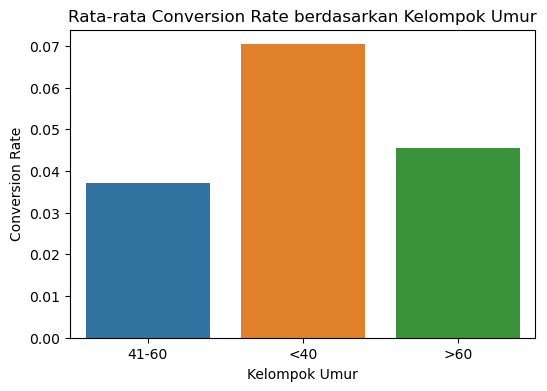

In [9]:
# Membuat plot
plt.figure(figsize=(6, 4))
sns.barplot(x='age_group', y='cvr', data=age_group_mean)
plt.title('Rata-rata Conversion Rate berdasarkan Kelompok Umur')
plt.xlabel('Kelompok Umur')
plt.ylabel('Conversion Rate')
plt.show()

**Kesimpulan:**
- Kelompok umur <40 tahun memiliki rata-rata tingkat conversion rate yang tinggi, yang menunjukkan kemungkinan ketertarikan terhadap marketing campaign yang ditawarkan dan juga adanya familiaritas terhadap teknologi dan platform online.
- Kelompok umur 40-60 tahun memiliki rata-rata tingkat conversion rate yang paling rendah, yang menunjukkan kemungkinan kurangnya ketertarikan terhadap marketing campaign yang ditawarkan.

---

## **Data Cleaning & Preprocessing**

In [103]:
df2 = df1.copy()

### Handle Missing Values
---

In [104]:
df2.isnull().sum()

Unnamed: 0              0
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntCoke                 0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
age                     0
age_group               0
total_children          0
total_spending          0
total_transaction       0
cvr                    11
dtype: int64

In [105]:
df2.fillna(df2['Income'].median(), inplace=True)
df2.fillna(df2['cvr'].median(), inplace=True)

In [106]:
df2.isna().sum()

Unnamed: 0             0
ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntCoke                0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
age                    0
age_group              0
total_children         0
total_spending         0
total_transaction      0
cvr                    0
dtype: int64

### Handle Duplicated Data
---

In [107]:
df2.duplicated().sum()

0

### Handle Outlier
---

In [108]:
#change Dt_Customer dtype from object to datetime 64[ns]
df2['Dt_Customer'] = pd.to_datetime(df2['Dt_Customer'], format='%d-%m-%Y')

In [109]:
#looping to categorize cat include categorical columns and num include numeric columns
cats = []
nums = []
date = []
for col in df2.columns: 
    if df2[col].dtype == 'O':
        cats.append(col)
    elif df2[col].dtype == 'int64' or df2[col].dtype == 'float64':
        nums.append(col)
    else:
        date.append(col)

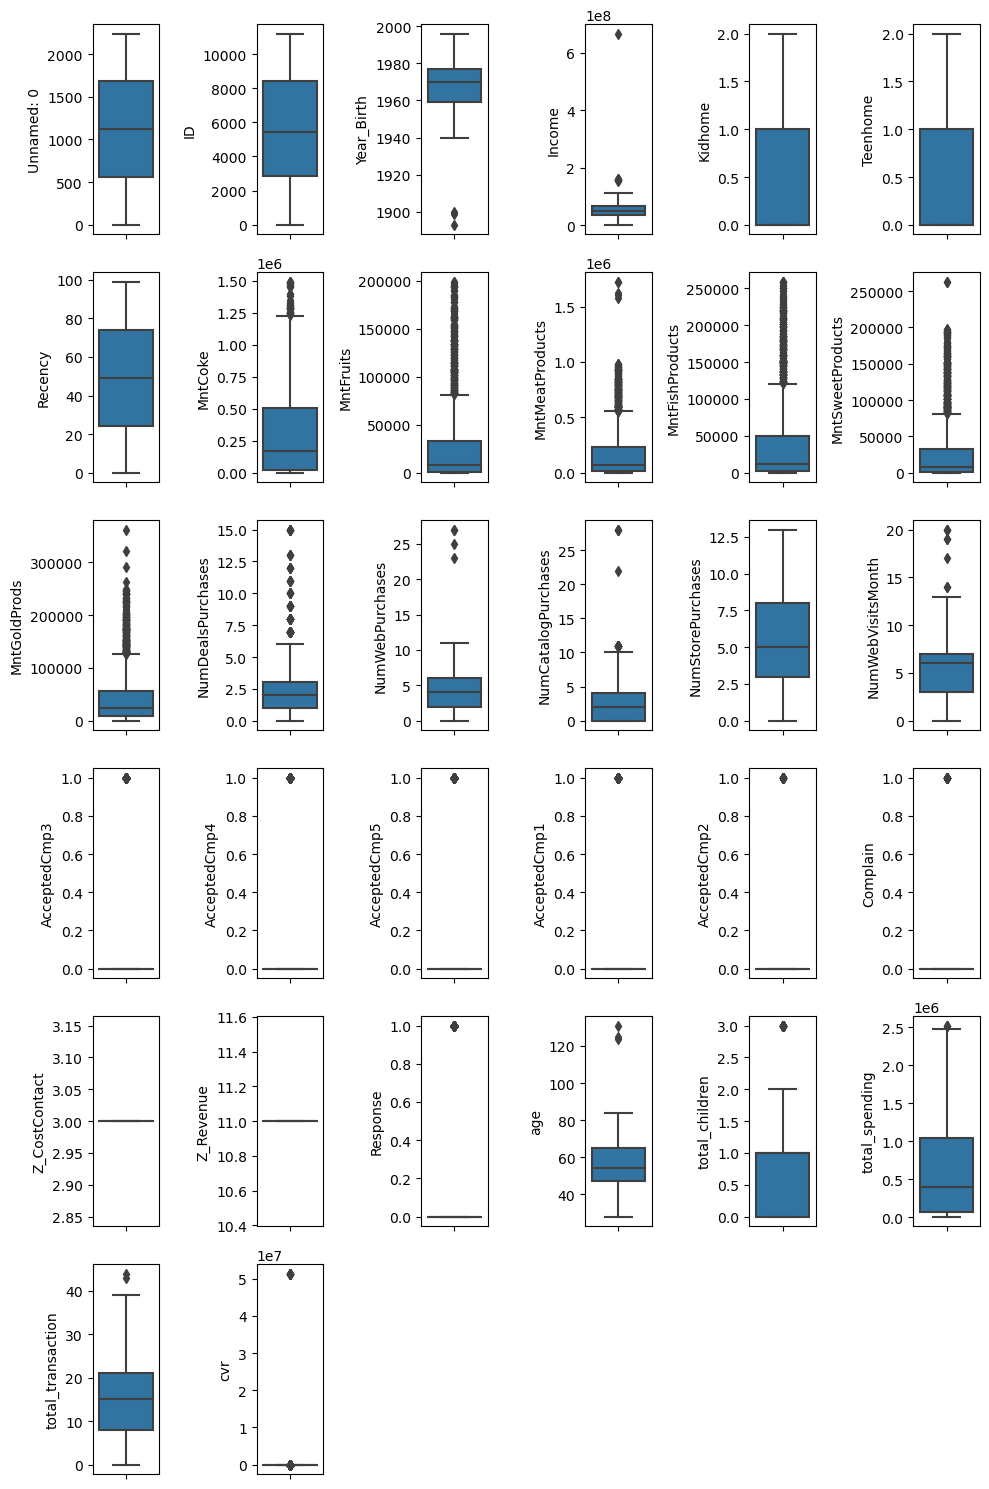

In [17]:
plt.figure(figsize= (10,15))
for i in range(len(nums)):
    plt.subplot(6, 6, i+1)
    sns.boxplot(y = df2[nums[i]], orient='v')
    plt.tight_layout()

In [110]:
from scipy import stats

In [111]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df2)}')

df_out = ['Income','Year_Birth','age']

filtered_entries = np.array([True] * len(df2))

for col in df_out:
    zscore = abs(stats.zscore(df2[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
df2 = df2[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah memfilter outlier: {len(df2)}')

Jumlah baris sebelum memfilter outlier: 2240
Jumlah baris setelah memfilter outlier: 2229


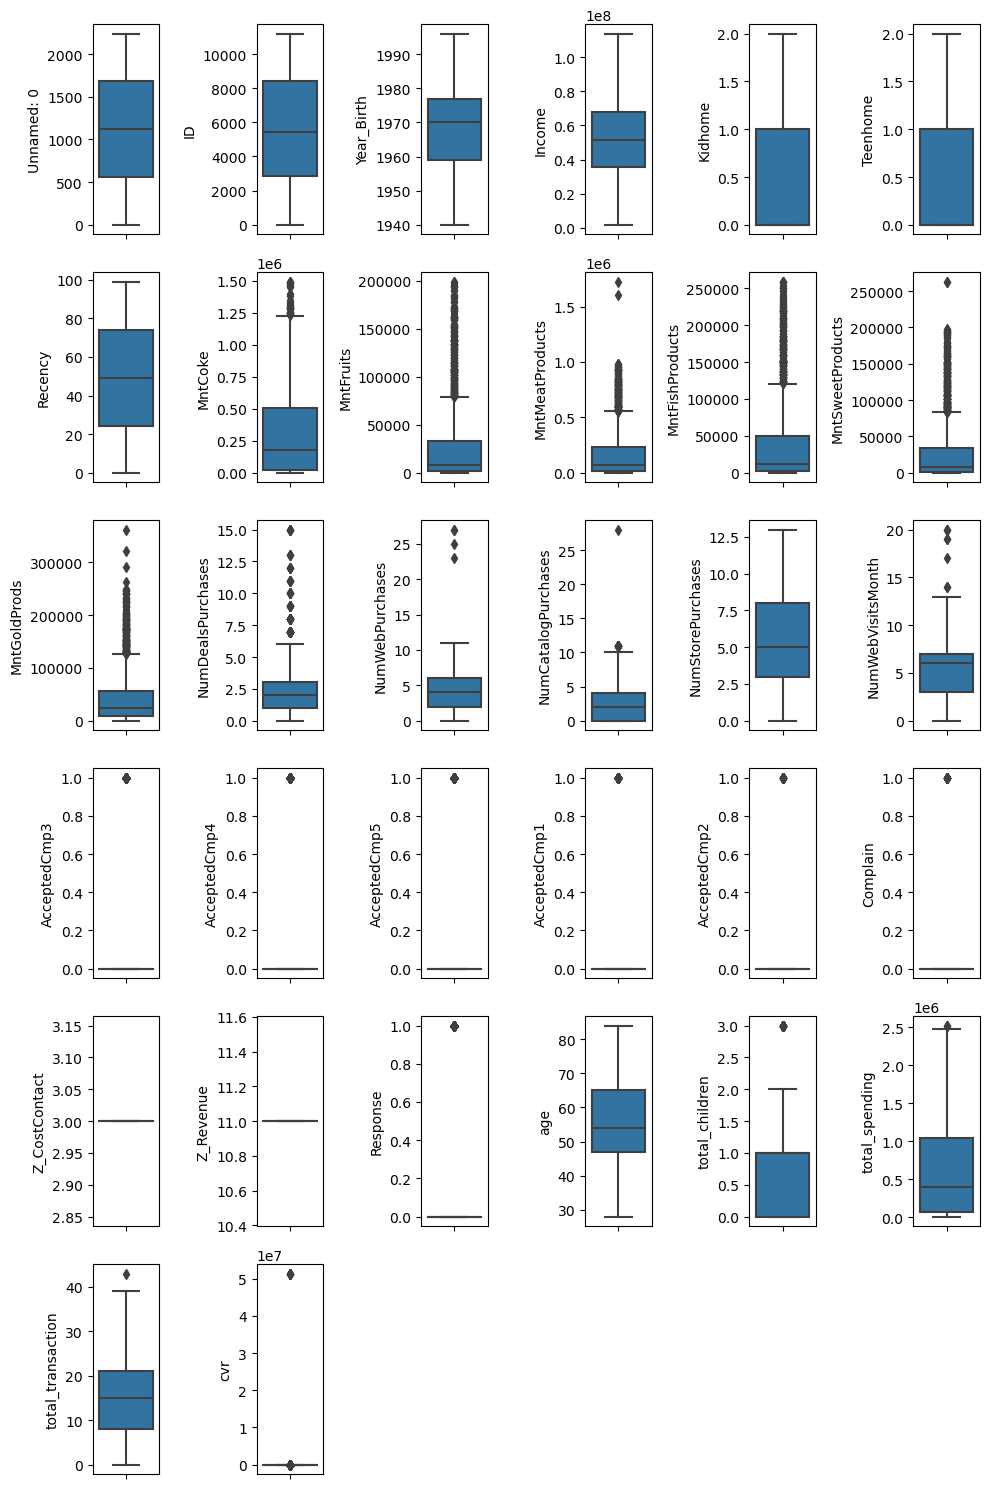

In [20]:
plt.figure(figsize= (10,15))
for i in range(len(nums)):
    plt.subplot(6, 6, i+1)
    sns.boxplot(y = df2[nums[i]], orient='v')
    plt.tight_layout()

### Feature Selection
---

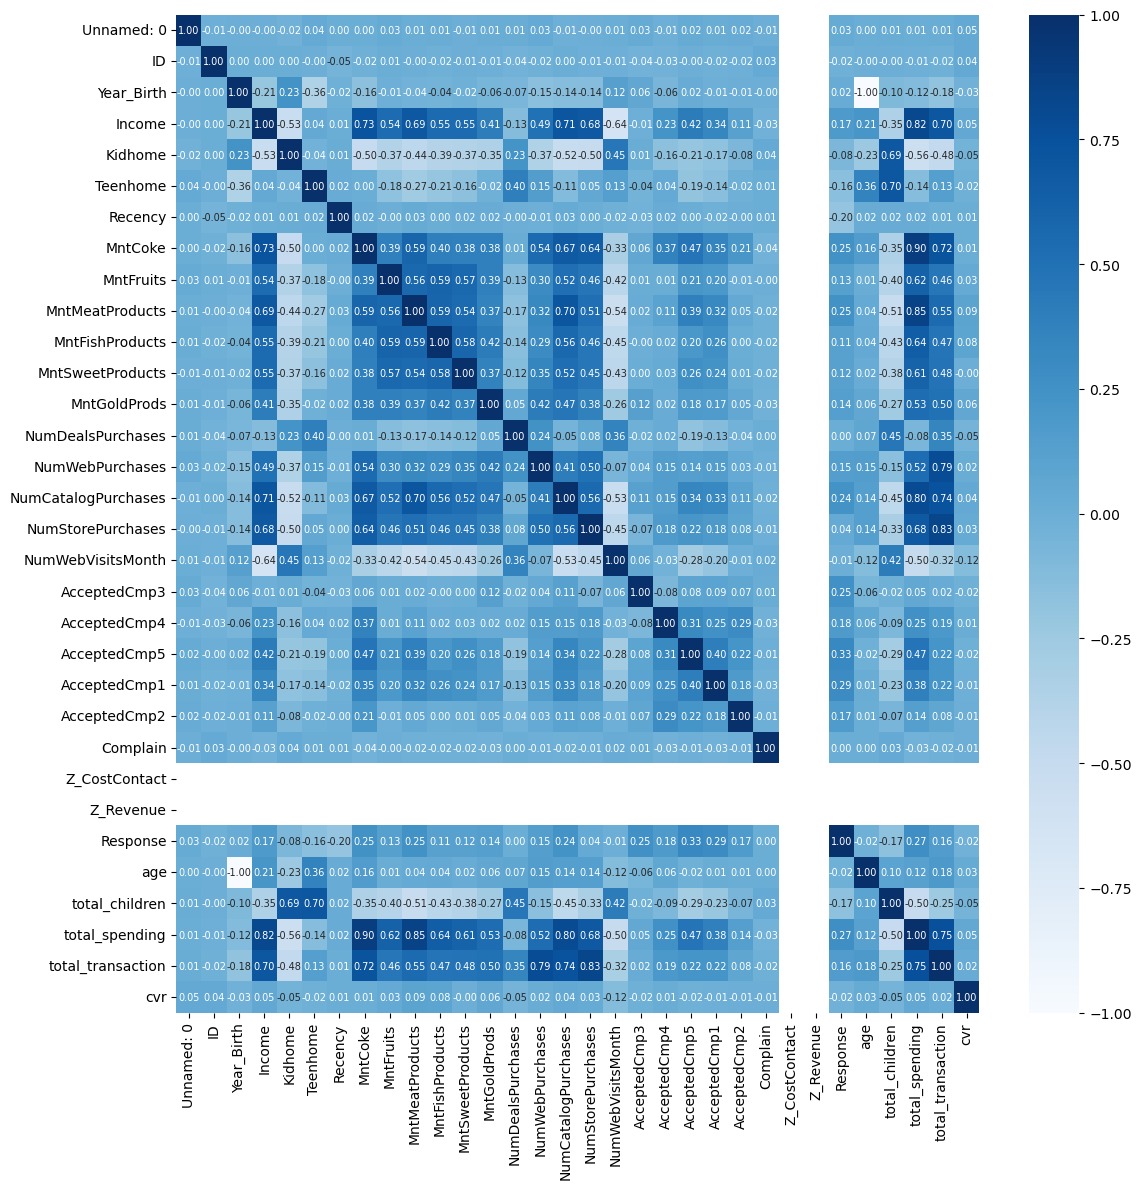

In [29]:
plt.figure(figsize=(12, 12))  # Increase the figure size further
heatmap = sns.heatmap(df2[nums].corr(), cmap='Blues', annot=True, fmt='.2f', annot_kws={"size": 7})
plt.tight_layout()
plt.show()

In [112]:
df2.drop(columns=['Unnamed: 0', 'ID', 'Z_CostContact', 'Z_Revenue'], inplace=True)

### Feature Encoding
---

In [113]:
df2['Education'].value_counts()

Education
S1     1124
S3      481
S2      369
D3      201
SMA      54
Name: count, dtype: int64

In [114]:
df3 = df2.copy()

In [115]:
# Feature encoding untuk kolom education
mapping_education = {
    'SMA' : 0,
    'D3' : 1,
    'S1' : 2,
    'S2' : 3,
    'S3' : 4
}

df3['Education'] = df3['Education'].map(mapping_education)

In [116]:
df3.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,age,age_group,total_children,total_spending,total_transaction,cvr
0,1957,2,Lajang,58138000.0,0,0,2012-09-04,58,635000,88000,...,0,0,0,1,67,>60,0,1617000,25,0.142857
1,1954,2,Lajang,46344000.0,1,1,2014-03-08,38,11000,1000,...,0,0,0,0,70,>60,2,27000,6,0.000000
2,1965,2,Bertunangan,71613000.0,0,0,2013-08-21,26,426000,49000,...,0,0,0,0,59,41-60,0,776000,21,0.000000
3,1984,2,Bertunangan,26646000.0,1,0,2014-02-10,26,11000,4000,...,0,0,0,0,40,<40,1,53000,8,0.000000
4,1981,4,Menikah,58293000.0,1,0,2014-01-19,94,173000,43000,...,0,0,0,0,43,41-60,1,422000,19,0.000000


### Standardization
---

In [117]:
dfs = df3.copy()

In [118]:
dfs = dfs.drop(columns=['Year_Birth', 'Education', 'Marital_Status', 'Dt_Customer', 'age_group'])

In [119]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = StandardScaler()
dfs = pd.DataFrame(scaler.fit_transform(dfs), columns=dfs.columns)

In [120]:
dfs.head()

,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,age,total_children,total_spending,total_transaction,cvr
0,0.316484,-0.825592,-0.931676,0.307314,0.980166,1.550778,1.736151,2.456789,1.472029,0.842690,...,-0.279954,-0.262802,-0.116801,-0.095152,2.381943,1.015715,-1.266277,1.683247,1.329444,-0.056128
1,-0.256135,1.031365,0.904492,-0.383771,-0.873191,-0.637618,-0.726371,-0.651738,-0.632996,-0.731824,...,-0.279954,-0.262802,-0.116801,-0.095152,-0.419825,1.272020,1.393978,-0.962795,-1.163838,-0.056128
2,0.970719,-0.825592,-0.931676,-0.798422,0.359410,0.569773,-0.174584,1.341376,-0.149082,-0.040574,...,-0.279954,-0.262802,-0.116801,-0.095152,-0.419825,0.332234,-1.266277,0.283674,0.804543,-0.056128
3,-1.212506,1.031365,-0.931676,-0.798422,-0.873191,-0.562156,-0.662528,-0.505455,-0.584604,-0.751025,...,-0.279954,-0.262802,-0.116801,-0.095152,-0.419825,-1.291031,0.063851,-0.919526,-0.901387,-0.056128
4,0.324010,1.031365,-0.931676,1.551268,-0.392031,0.418849,-0.215626,0.152822,-0.003908,-0.559011,...,-0.279954,-0.262802,-0.116801,-0.095152,-0.419825,-1.034726,0.063851,-0.305445,0.542092,-0.056128


---

## **Data Modeling**

### Elbow Method
---

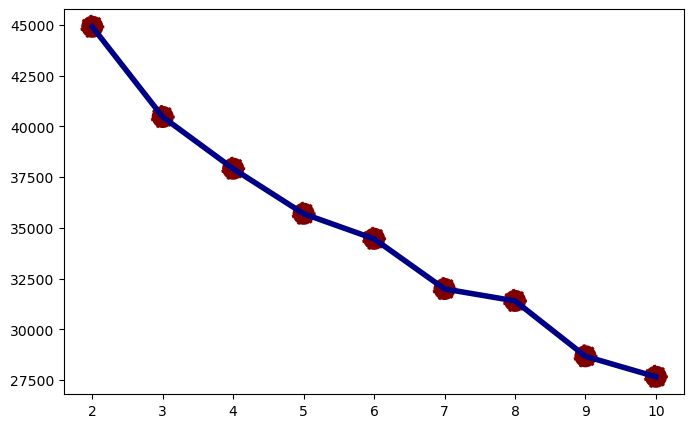

In [121]:
from sklearn.cluster import KMeans
inertia = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(dfs)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))

sns.lineplot(x=range(2, 11), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2, 11), y=inertia, s=300, color='#800000',  linestyle='--')
plt.show()

In [122]:
#Cek persentase claster
(pd.Series(inertia) - pd.Series(inertia).shift(-1)) / pd.Series(inertia) *100

0    9.896437
1    6.299750
2    5.854967
3    3.459356
4    7.168170
5    1.840150
6    8.690696
7    3.522268
8         NaN
dtype: float64

Nilai K optimal adalah 4.

### K-Means Clustering
---

In [123]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(dfs.values)

KMeans(n_clusters=4, random_state=0)

In [124]:
clusters = kmeans.labels_
dfs['clusters'] = clusters
dfs.sample(5)

,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,age,total_children,total_spending,total_transaction,cvr,clusters
766,-0.873810,1.031365,0.904492,-0.936639,-0.790027,-0.637618,-0.653407,-0.633453,-0.560409,-0.616615,...,-0.262802,-0.116801,-0.095152,-0.419825,-0.265811,1.393978,-0.872929,-0.770162,-0.056128,0
901,-0.181122,1.031365,-0.931676,1.551268,-0.819729,-0.662772,-0.621486,-0.688309,-0.536213,-0.770226,...,-0.262802,-0.116801,-0.095152,-0.419825,-0.436681,0.063851,-0.896228,-1.163838,-0.056128,0
1157,-0.547445,-0.825592,0.904492,-0.038228,-0.282136,-0.662772,-0.726371,-0.688309,-0.657191,-0.808629,...,-0.262802,-0.116801,-0.095152,-0.419825,-0.436681,0.063851,-0.644937,-0.376486,-0.056128,0
1,-0.256135,1.031365,0.904492,-0.383771,-0.873191,-0.637618,-0.726371,-0.651738,-0.632996,-0.731824,...,-0.262802,-0.116801,-0.095152,-0.419825,1.272020,1.393978,-0.962795,-1.163838,-0.056128,0
1419,-0.405431,1.031365,-0.931676,0.410977,-0.876161,-0.637618,-0.721811,-0.688309,-0.657191,-0.827830,...,-0.262802,-0.116801,-0.095152,-0.419825,-0.265811,0.063851,-0.976108,-1.426289,-0.056128,0


In [125]:
from sklearn.decomposition import PCA 

pca = PCA(n_components=2)

pca.fit(dfs)
pcs = pca.transform(dfs)

df_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
df_pca.head()

,PC 1,PC 2
0,4.658777,-0.101051
1,-3.148097,0.372624
2,2.307026,-0.339335
3,-2.996526,-1.391899
4,-0.265590,0.248701


In [128]:
df_pca['clusters'] = clusters
df_pca.head(2)

,PC 1,PC 2,clusters
0,4.658777,-0.101051,2
1,-3.148097,0.372624,0


Text(0.5, 1.0, 'Cluster Segementation')

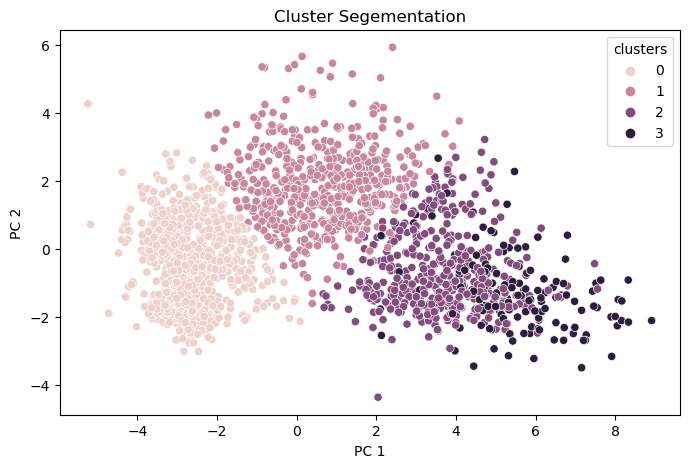

In [127]:
# visualisasi hasi segmentasi
fig, ax = plt.subplots(figsize=(8,5))
sns.scatterplot(data=df_pca, x='PC 1', y='PC 2', hue='clusters')
plt.title('Cluster Segementation')

### Silhouette Score
---

In [130]:
sil_score = silhouette_score(df_pca, clusters)
print(f'The silhouette score for 4 clusters is: {sil_score:.4f}')

The silhouette score for 4 clusters is: 0.4663


Silhouette score yang didapatkan adalah 0.4663 yang menunjukkan tingkat kualitas pengelompokan yang termasuk baik, dimana kelompok segmentasi tersebut cukup berbeda namun kemungkinan ada beberapa area yang overlap atau jarak kedekatannya ada di dekat batas cluster.